In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
dataset = '/kaggle/input/flight-price-prediction/Clean_Dataset.csv'
df = pd.read_csv(dataset)
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [3]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [5]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [6]:
categorical_features  = [feature for feature in df.columns if df[feature].dtype == 'O' ]

In [7]:
## print number of unique values 

cat_number_of_unique_ = {}
for feature in categorical_features:
    cat_number_of_unique_[feature] = df[feature].nunique()

In [8]:
cat_number_of_unique_

{'airline': 6,
 'flight': 1561,
 'source_city': 6,
 'departure_time': 6,
 'stops': 3,
 'arrival_time': 6,
 'destination_city': 6,
 'class': 2}

In [9]:
## Split the data into economy and business class dataframe
economy = df[df['class'] == 'Economy']
business = df[df['class'] == 'Business']

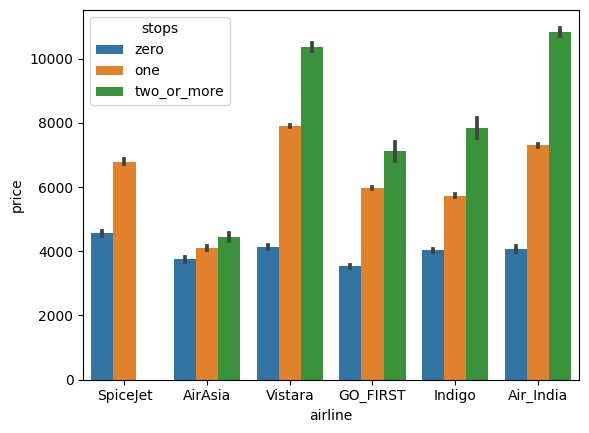

In [10]:
sns.barplot(data=economy, x="airline", y="price",hue='stops',)
plt.show()

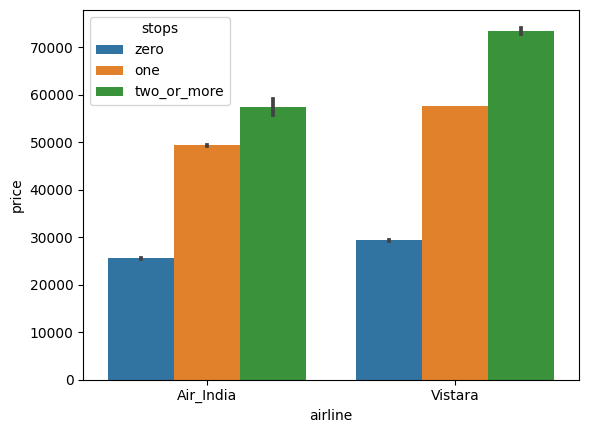

In [11]:
sns.barplot(data=business, x="airline", y="price",hue='stops')
plt.show()

<AxesSubplot: xlabel='airline', ylabel='duration'>

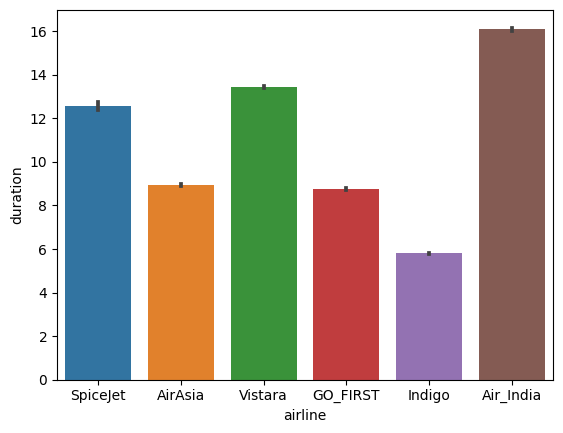

In [12]:
sns.barplot(data=economy, x="airline", y="duration")

In [13]:
city_list = df['destination_city'].unique().tolist()
color_code = ['red','blue','green','yellow','orange','violet']
color_code = dict(zip(city_list,color_code))
required_lists = ['duration','days_left','price']

<AxesSubplot: xlabel='airline', ylabel='price'>

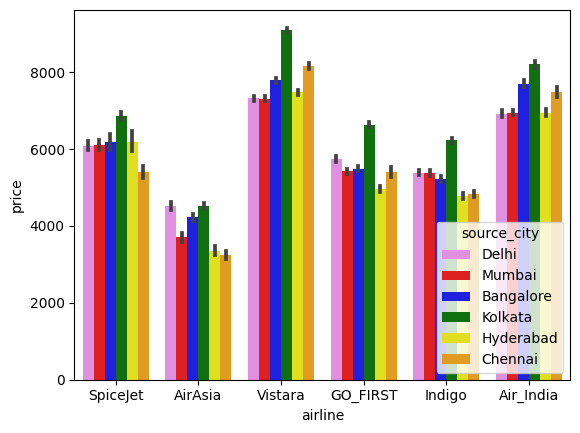

In [14]:
sns.barplot(data=economy, x="airline", y="price",hue='source_city',palette=color_code)

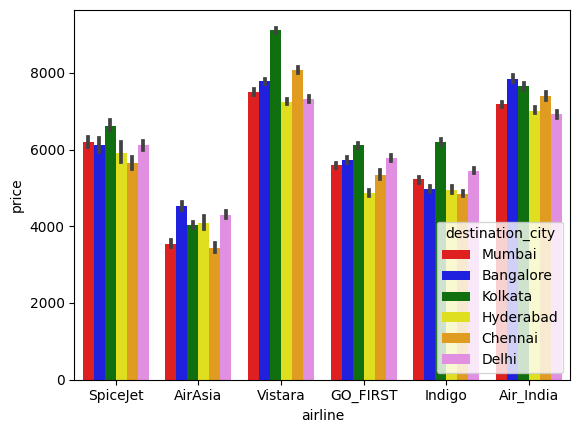

In [15]:
sns.barplot(data=economy, x="airline", y="price",hue='destination_city',palette=color_code)
plt.show()

In [16]:
pd.crosstab(df['source_city'], 
            df['destination_city'],
            margins = False
           )

destination_city,Bangalore,Chennai,Delhi,Hyderabad,Kolkata,Mumbai
source_city,,,,,,
Bangalore,0,6410,13756,8928,10028,12939
Chennai,6493,0,9783,6103,6983,9338
Delhi,14012,10780,0,9328,11934,15289
Hyderabad,7854,6395,8506,0,7987,10064
Kolkata,9824,6653,10506,7897,0,11467
Mumbai,12885,10130,14809,10470,12602,0


In [17]:
pivot = pd.pivot_table(economy, values='duration',
               index=['departure_time', 'arrival_time'],
               columns=['stops'],
              aggfunc=[np.mean,np.std])

# Different supporting functions

In [18]:
def list_of_same_value(list_of_number):
    
    diff_number =[]
    for i in list_of_number:
        if i not in diff_number:
            diff_number.append(i)
    return diff_number

def split_data_into_based_on_days(data):
    
    # split the data into 2
    till_second_week = data[data['days_left']<16]
    rest_weak = data[data['days_left']>15]
    # value of price on 15 days_left
    weak_last_number = till_second_week.loc[till_second_week['days_left'] == 15, 'price'].values
    
    return till_second_week,rest_weak,weak_last_number   

def collect_dataframe_less_than_20(data):
    if len(data)<20:
        return data.index.to_list()
    else:
        pass
    
def required_df_dep_and_indep_data_split(data):
    # independent feature 
    x = data[['duration','days_left']]
    # dependent features
    y = data['price']
    
    return x,y 

def varience_threshold(data, threshold):
    
    x,y = required_df_dep_and_indep_data_split(data)
    # train and test data split
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3,random_state=42)
    
    model = VarianceThreshold(threshold=threshold)
    # fit the model
    model.fit(x_train)
    
    return model.fit(x_train)
def outlier_removal_std(dict_name,std):
    right_side = dict_name['mean'] + dict_name['std']*std
    left_side  = dict_name['mean'] - dict_name['std']*std
    return right_side,left_side

## Plot Diagrams

In [19]:
def plot_line_based_on_airline_city(data,time_and_city):
    
    my_colors = ['green', 'blue', 'orange']
    for airline, airline_df in data.groupby('airline'):
        
        for time_city, time_city_df in airline_df.groupby(['departure_time', 'arrival_time', 'source_city', 'destination_city']):
            try:
                if time_city ==tuple(time_and_city):
                        
                    fig, axs = plt.subplots(ncols=2, figsize=(10, 4))

                    # Plot price vs days left for each stop
                    sns.lineplot(data=airline_df, x='days_left', y='price', hue='stops', palette=my_colors, ax=axs[0])
                    axs[0].set_title('Price vs Days Left')
                    axs[0].set_xlabel('Days Left')
                    axs[0].set_ylabel('Price')


                    # Plot price vs duration for each stop
                    sns.lineplot(data=airline_df, x='duration', y='price', hue='stops', palette=my_colors, ax=axs[1])
                    axs[1].set_title('Price vs Duration')
                    axs[1].set_xlabel('Duration')
                    axs[1].set_ylabel('Price')
                    axs[1].legend(loc='lower right')

                    plt.suptitle('{} : {} to {} ({} to {})'.format(airline,time_city[2],time_city[3],time_city[0],time_city[1]))                 
                    plt.tight_layout()
                    plt.show()
            except:
                print('Combination of place and time is not applicable')


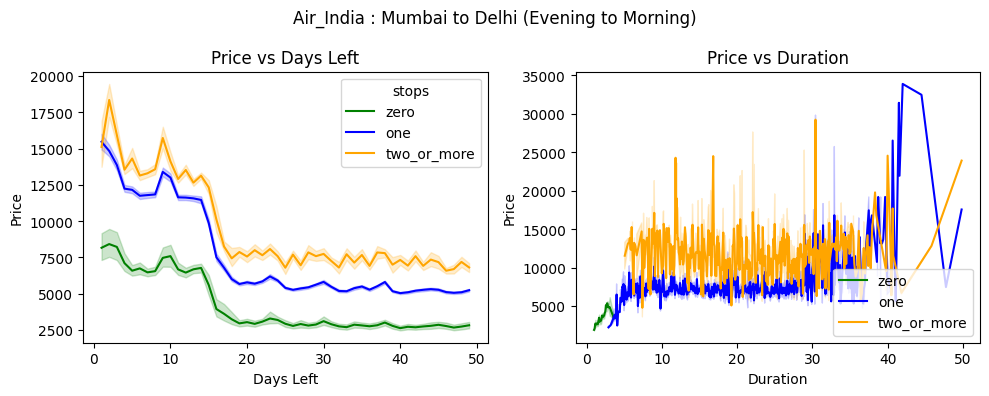

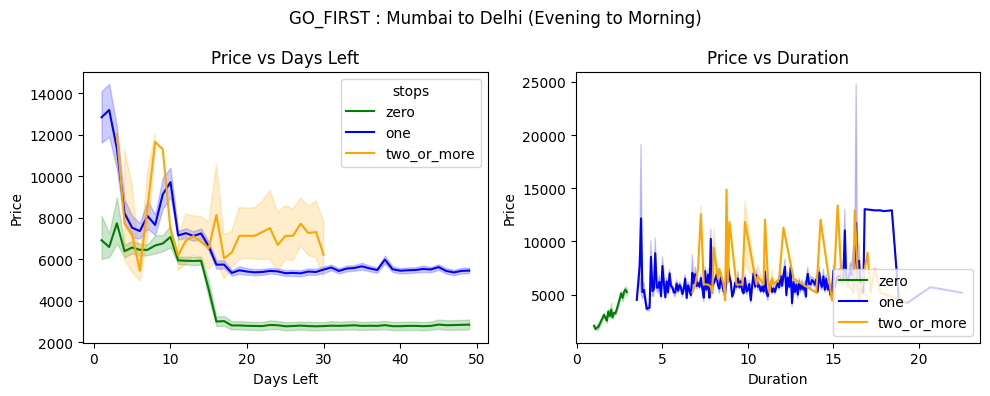

/tmp/ipykernel_34/1949452048.py:13: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.lineplot(data=airline_df, x='days_left', y='price', hue='stops', palette=my_colors, ax=axs[0])
/tmp/ipykernel_34/1949452048.py:20: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.lineplot(data=airline_df, x='duration', y='price', hue='stops', palette=my_colors, ax=axs[1])


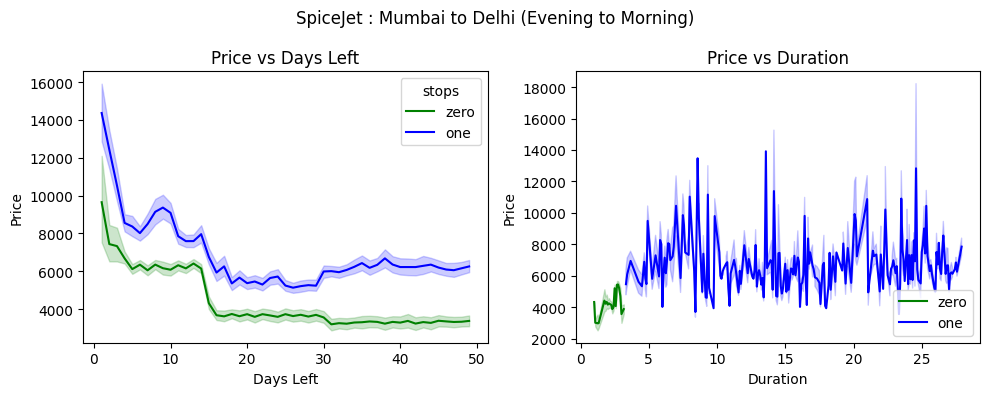

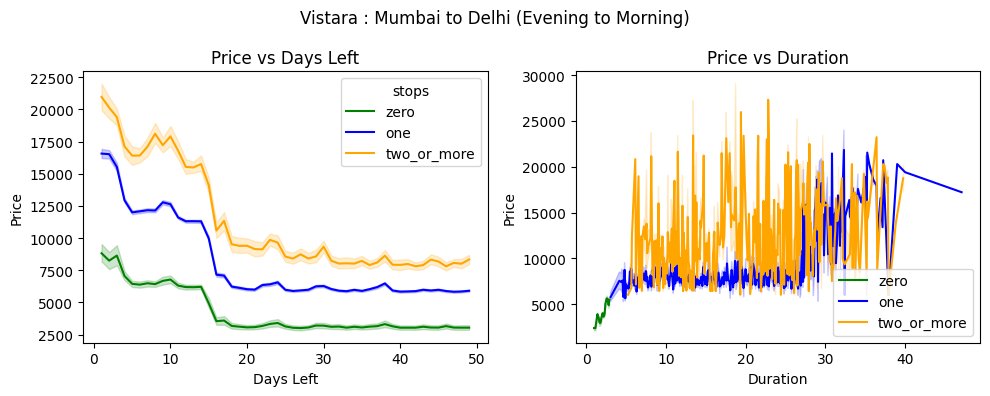

In [20]:
plot_line_based_on_airline_city(economy,['Evening','Morning','Mumbai','Delhi'])

In [21]:
def scatter_plot_on_airlines(data,hue) :
    
    hues = ['zero', 'one', 'two_or_more']
    my_colors = ['green', 'tab:blue', 'tab:orange']
    
    
    for airline, airline_df in economy.groupby('airline'):

        fig,axs = plt.subplots(ncols=2,figsize=(10,4))
        if hue == 'stops':
            
            sns.scatterplot(data=airline_df,x='duration',y='price',hue=hue,hue_order=hues,ax=axs[0],palette=my_colors,alpha=0.3)
            axs[0].set_title('Price vs Duration')
            axs[0].set_xlabel('Duration')
            axs[0].set_ylabel('Price')
            axs[0].set_xlim([0,60])
            axs[0].set_ylim([0,45000])

            sns.scatterplot(data=airline_df,x='days_left',y='price',hue=hue, hue_order=hues,ax=axs[1],palette=my_colors,alpha=0.45)
            axs[1].set_title('Price vs Days Left')
            axs[1].set_xlabel('days_left')
            axs[1].set_ylabel('Price')
            axs[1].set_xlim([0,60])
            axs[1].set_ylim([0,45000])
            
        else:
            sns.scatterplot(data=airline_df,x='duration',y='price',hue=hue,ax=axs[0],alpha=0.3)
            axs[0].set_title('Price vs Duration')
            axs[0].set_xlabel('Duration')
            axs[0].set_ylabel('Price')
            axs[0].set_xlim([0,60])
            axs[0].set_ylim([0,45000])

            sns.scatterplot(data=airline_df,x='days_left',y='price',hue=hue,ax=axs[1],alpha=0.45)
            axs[1].set_title('Price vs Days Left')
            axs[1].set_xlabel('days_left')
            axs[1].set_ylabel('Price')
            axs[1].set_xlim([0,60])
            axs[1].set_ylim([0,45000])

        plt.suptitle('{} '.format(airline) )  
        plt.tight_layout()
        plt.show()

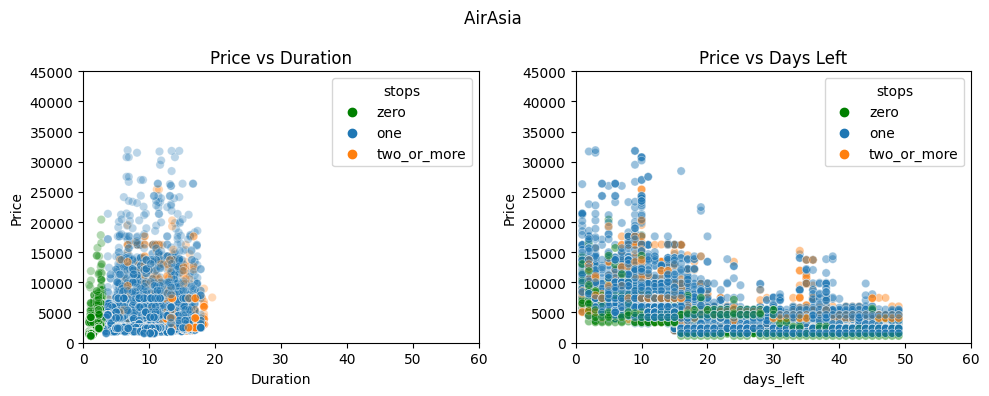

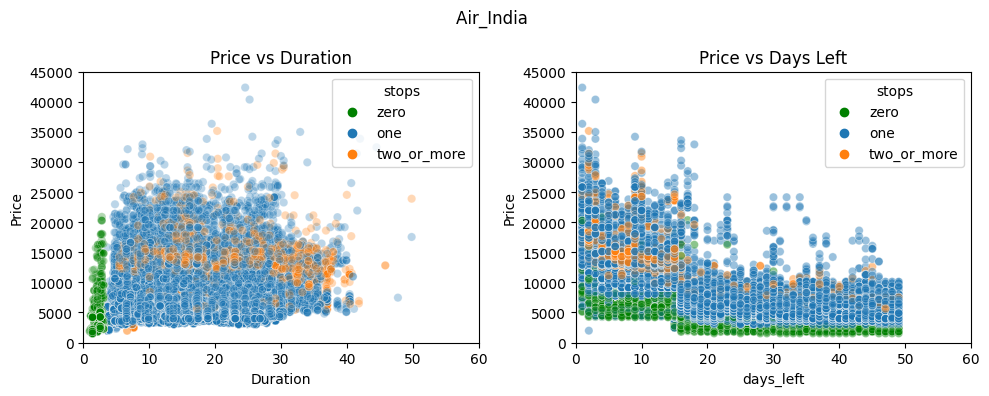

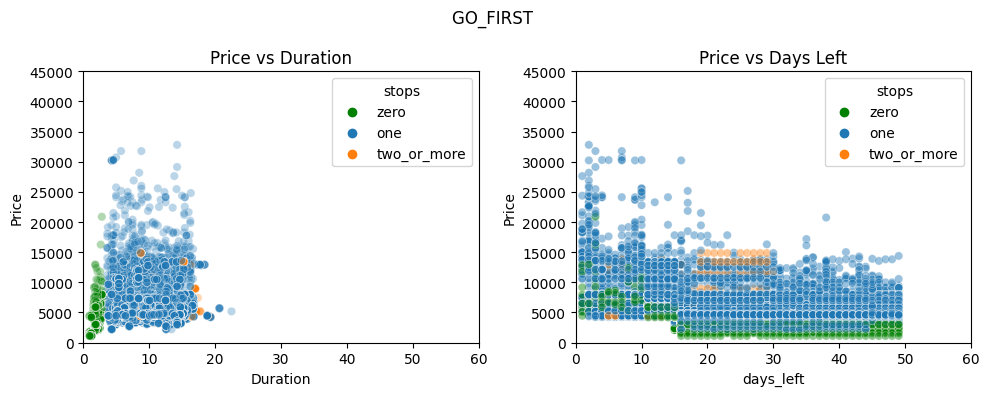

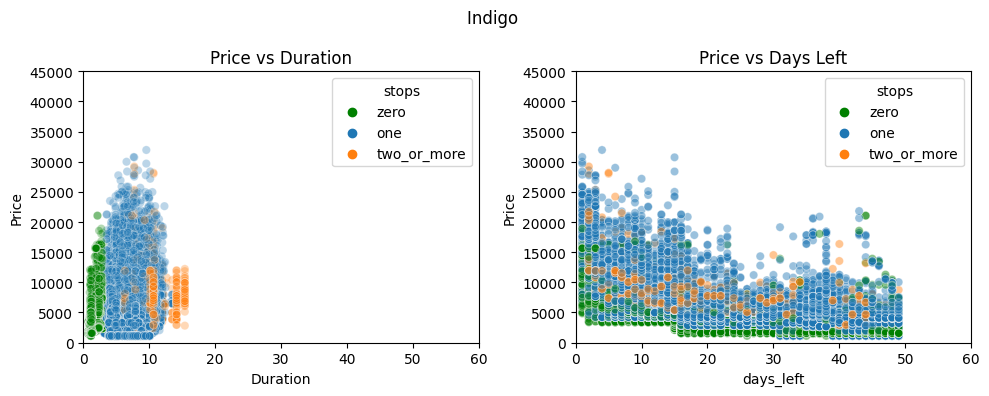

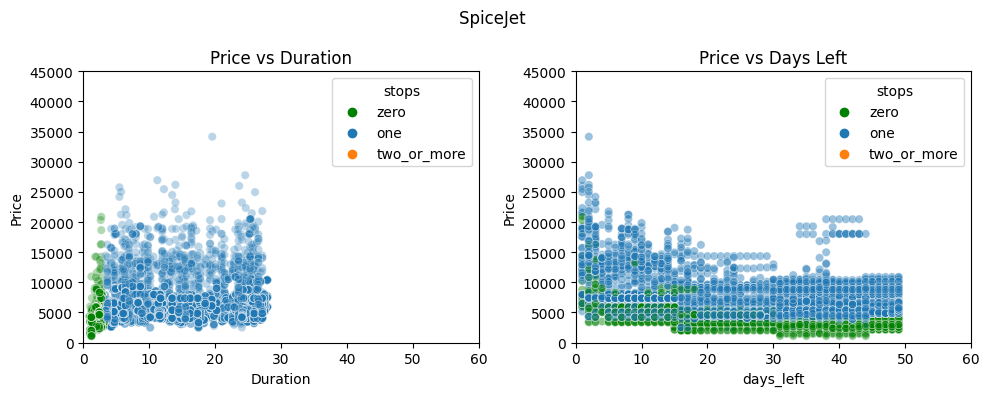

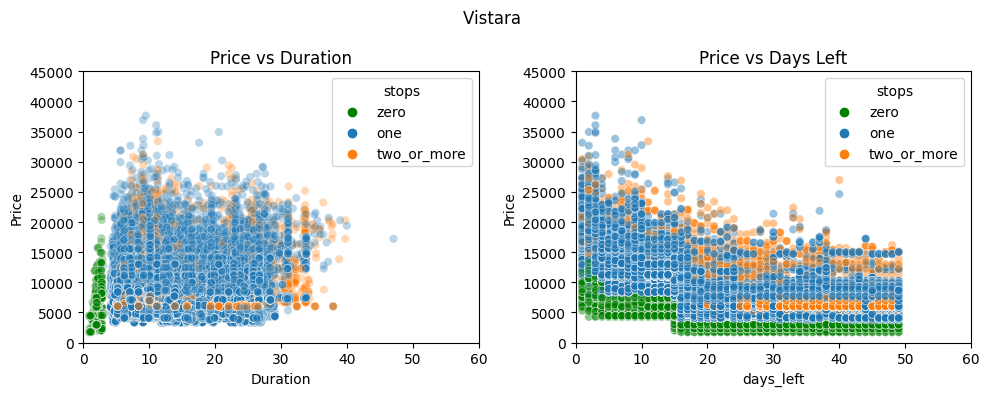

In [22]:
scatter_plot_on_airlines(economy,'stops')

In days_left vs price , the prices are high steep drop after day 15

## Outlier Remove 

In [23]:
def remove_duration_outlier(data):
    
    non_duration_df = pd.DataFrame()
    for airline,airline_df in data.groupby('airline'):
        city_dict = {}
        for city, city_df in airline_df.groupby(['source_city','destination_city','stops']):
            city_dict[city]= {
                'mean':np.mean(city_df['duration']),
                'std': np.std(city_df['duration']),
                'count': city_df.shape[0]
            }
        for city,city_df in airline_df.groupby(['source_city','destination_city','stops']):
            stats = city_dict.get(city)
            right_side,left_side = outlier_removal_std(stats,std=2)
            
            #duration_df = 
            city_out = city_df[(city_df['duration']<right_side) & (city_df['duration']>left_side)]
            non_duration_df = pd.concat([non_duration_df,city_out])
    return non_duration_df

In [24]:
business1 = remove_duration_outlier(business)
economy1 = remove_duration_outlier(economy)

## Radial polar diagram

In [25]:
## extract a list of colors for later use with each visualization.
def get_color(name, number):
    pal = list(sns.color_palette(palette=name,n_colors=number))
    return pal

In [26]:
pal_vi = get_color('viridis_r', len(df))
pal_plas = get_color('plasma_r', len(df))
pal_spec = get_color('Spectral', len(df))
pal_hsv = get_color('hsv', len(df))

In [27]:
def create_dataframe_based_on_duration(data,name):
    
    for airline,airline_df in data.groupby('airline'):
        if airline == name:

            city_name = list()
            duration_df = pd.DataFrame(columns=['city_name', 'duration'])

            plc_df = airline_df.groupby(['source_city', 'destination_city'])
            for i,(place,place_df) in enumerate(plc_df):
                city2 = '%s %s'%(place[0],place[1])
                ##city_name.append(city2)

                city_name = city2
                duration= place_df['duration'].min()
                duration_df.loc[i] = [city_name, duration]
            duration_df = duration_df.sort_values(by='duration')
    
        

    # color code
    pal_vi = plt.get_cmap('viridis_r', len(duration_df))

    plt.figure(figsize=(10,10))
    ax = plt.subplot(111, polar=True)
    ax.set_theta_zero_location('E')

    #set min and max value
    lowerLimit = 0
    max_v = duration_df['duration'].max()

    #set heights and width
    heights = duration_df['duration']
    width = 2*np.pi / len(duration_df.index)

    #set index and angle
    indexes = list(range(1, len(duration_df.index)+1))
    angles = [element * width for element in indexes]
    bars = ax.bar(x=angles, height=heights, width=width, bottom=lowerLimit,
                    linewidth=1, edgecolor="white", color=pal_vi(np.arange(len(duration_df))))

    labelPadding = 0.5

    for bar, angle, height, label in zip(bars,angles, heights, duration_df['city_name']):


        rotation = np.rad2deg(angle)
        alignment = ""
        if angle >= np.pi/2 and angle<= 3*np.pi/2:
            alignment = "right"
            rotation = rotation + 180
        else:
            alignment = "left"

        ax.text(x=angle, y=lowerLimit + height + labelPadding,
                s=label, ha=alignment, va='center', rotation=rotation, 
                rotation_mode="anchor")
        ax.set_thetagrids([], [])
    ax.title.set_rotation(180)
    plt.title(f'{name}---- Duration - Places',rotation=0,fontsize=20)
    plt.tight_layout(pad=2)



    plt.show()


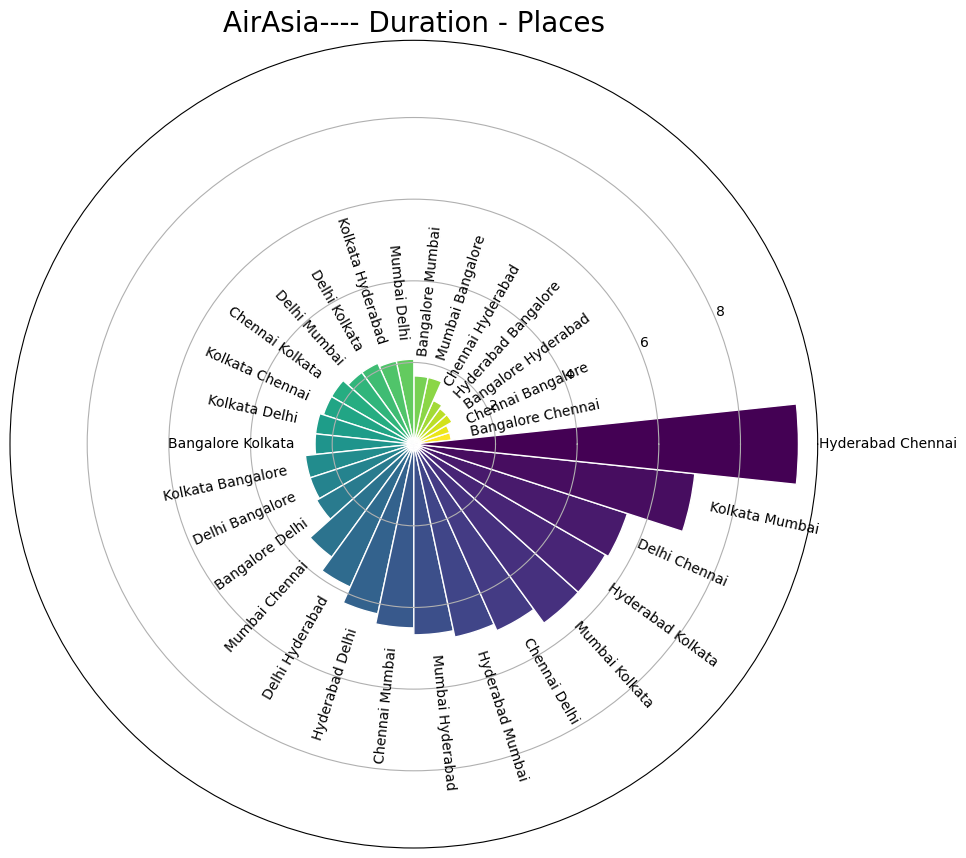

In [28]:
create_dataframe_based_on_duration(economy1,'AirAsia')

In [29]:
def remove_outlier(data):
    df_out = pd.DataFrame()
    for airline,airline_df in data.groupby('airline'):

        second_week_dict = {}
        rest_weak_dict = {}
        place_dict = {}
        for place,place_df in airline_df.groupby(['source_city','destination_city','stops']):
            second_week,rest_week,week_last_number = split_data_into_based_on_days(place_df)

            second_week_dict[place] = {
                'mean':np.mean(second_week['price']),
                'std': np.std(second_week['price']),
                'count': second_week.shape[0]
            }
            rest_weak_dict[place] = {    
                'mean':np.mean(second_week['price']),
                'std': np.std(second_week['price']),
                'count': second_week.shape[0]
            }
            place_dict[place] = {
                'mean':np.mean(place_df['price']),
                'std': np.std(place_df['price']),
                'count': second_week.shape[0]
            }
        for place,place_df in airline_df.groupby(['source_city','destination_city','stops']):
            stat        = place_dict.get(place)  
            if stat['std'] != 0 and stat['count']>15:
                second_week,rest_week,week_last_number = split_data_into_based_on_days(place_df)
                # get place stat for second and rest dataframe
                second_stat = second_week_dict.get(place)
                rest_stat   = rest_weak_dict.get(place)
                # right and left hand side values, for outliers
                second_right_side,second_left_side = outlier_removal_std(second_stat,std=3) 
                rest_right_side,rest_left_side = outlier_removal_std(rest_stat,std=3) 


                second_place_out = second_week[(second_week['price']<second_right_side) & (second_week['price']>second_left_side)]
                rest_place_out   = rest_week[(rest_week['price']<rest_right_side) & (rest_week['price']>rest_left_side)]

                #concat the second and rest place_out data frame
                place_df_concat = pd.concat([second_place_out,rest_place_out])
                # concat final dataframe
                df_out = pd.concat([df_out,place_df_concat])
    return df_out         


In [30]:
eco_df = remove_outlier(economy1)
buss_df = remove_outlier(business1)

## Static tests

In [31]:
from statsmodels.formula.api import ols
import  statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2

##  Anova test 

In [32]:
def is_there_any_association(data,target,feature):
    
    replaced_place_df = pd.DataFrame()
    eco_out = pd.DataFrame()
    
    for airline,airline_df in data.groupby('airline'):
        for place,place_df in airline_df.groupby(['source_city','destination_city']):
            # avova test for duration and stops
            anova_0 = ols(target+'~'+feature,data=place_df).fit()
            stop_test = sm.stats.anova_lm(anova_0,type=2)
            
            # number of unique value
            no_of_unique_value = place_df[feature].nunique()
            
            if stop_test['PR(>F)'].loc[feature]>0.05:
                high_no_index = place_df[feature].value_counts().nlargest(no_of_unique_value).index[0]
                replace_index = place_df[feature].value_counts().nlargest().index[1:no_of_unique_value]
                # replce lesser count index to mainly used value
                place_df[feature].replace(replace_index,high_no_index,inplace=True)
                #concat the dataframe
                replaced_place_df = pd.concat([replaced_place_df,place_df])
            else:
                eco_out = pd.concat([eco_out,place_df])
    df_final = pd.concat([replaced_place_df,eco_out])
    return df_final

conducted ANOVA test for is there is any independece between **price V/s Stops** and **Price V/s duration**, If there is no independece between stops and price , we make the stop into single variable. 

In [33]:
df1 = pd.concat([eco_df,buss_df])

# Feature selection

In [34]:
from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler

## target encording

In [35]:
## target encording
df2 = df1.copy()
tar_en = TargetEncoder()
tar_en.fit(df2['flight'],df2['price'])
df2['flight_'] = tar_en.transform(df2['flight'])

df2.drop('flight',axis=1,inplace=True)


## One hotencording

In [36]:
df3 = df2.copy()
df3 = pd.get_dummies(df2,drop_first=True)

# Model Buiding 

In [37]:
#independet feature 
x = df3.drop(['price'],axis=1)

# dependent feature
y = df3['price']

In [38]:
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42,shuffle=True)

In [39]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import LinearSVR,SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


from sklearn.metrics import r2_score,mean_absolute_error


In [40]:
### Define models

models={
    'Linear regression'     : LinearRegression(),
    'Linear regression (L2)' : Ridge(),
    'Linear regression(L1)' : Lasso(),
    'Gradient boosting'     : GradientBoostingRegressor(),
    'XGBoosting'            : XGBRegressor(),
    'Light GBM'             : LGBMRegressor(),
    'K-nearest neighbour'   : KNeighborsRegressor(),
    'Neural Network'        : MLPRegressor(),
    'Decision tree'         : DecisionTreeRegressor(),
    'Random forest'         : RandomForestRegressor()

}


### make a scaler
scaler=StandardScaler()


In [41]:
for name, model in models.items():
    ### construct a pipeline
    pipeline=Pipeline(steps=[
        ('scaling',scaler),
        ('Modeling',model)
        
    ])
    
    pipeline.fit(x_train,y_train)
    print(name+'___trained')

    
    

Linear regression___trained
Linear regression (L2)___trained
Linear regression(L1)___trained
Gradient boosting___trained
XGBoosting___trained
Light GBM___trained
K-nearest neighbour___trained


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network___trained
Decision tree___trained
Random forest___trained


In [42]:
for name, model in models.items():
    ### construct a pipeline
    pipeline=Pipeline(steps=[
        ('scaling',scaler),
        ('Modeling',model)
        
    ])
    
    pipeline.fit(x_train,y_train)
    print(name+'___trained')
    print(name+'_accuracy score(test): {:.5f}'.format(pipeline.score(x_test,y_test)))
    
    print('--'*50)

Linear regression___trained
Linear regression_accuracy score(test): 0.92218
----------------------------------------------------------------------------------------------------
Linear regression (L2)___trained
Linear regression (L2)_accuracy score(test): 0.92218
----------------------------------------------------------------------------------------------------
Linear regression(L1)___trained
Linear regression(L1)_accuracy score(test): 0.92218
----------------------------------------------------------------------------------------------------
Gradient boosting___trained
Gradient boosting_accuracy score(test): 0.96779
----------------------------------------------------------------------------------------------------
XGBoosting___trained
XGBoosting_accuracy score(test): 0.98527
----------------------------------------------------------------------------------------------------
Light GBM___trained
Light GBM_accuracy score(test): 0.98025
---------------------------------------------------

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network___trained
Neural Network_accuracy score(test): 0.97036
----------------------------------------------------------------------------------------------------
Decision tree___trained
Decision tree_accuracy score(test): 0.98456
----------------------------------------------------------------------------------------------------
Random forest___trained
Random forest_accuracy score(test): 0.99032
----------------------------------------------------------------------------------------------------


# Baseline model: Gradient boosting regression with all features

In [43]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,r2_score

gbr = GradientBoostingRegressor(max_depth=5,random_state=42)
# train regression using all features
gbr.fit(x_train,y_train)

GradientBoostingRegressor(max_depth=5, random_state=42)

In [44]:
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_selection import mutual_info_regression

gbr = GradientBoostingRegressor()

r2_score_list = []
for k in range(1,31):
    selector = SelectKBest(mutual_info_regression,k=k)
    selector.fit(x_train,y_train)
    
    sel_x_train = selector.transform(x_train)
    sel_x_test = selector.transform(x_test)
    
    gbr.fit(sel_x_train,y_train)                                
    y_pred = gbr.predict(sel_x_test)
    r2 = r2_score(y_test, y_pred)
    r2_score_list.append(r2)
    
best_k = r2_score_list.index(max(r2_score_list)) + 1

# Select the best k features
selector = SelectKBest(mutual_info_regression, k=best_k)
selector.fit(x_train, y_train)

sel_x_train = selector.transform(x_train)
sel_x_test = selector.transform(x_test)

gbr.fit(sel_x_train, y_train)
y_pred = gbr.predict(sel_x_test)

KeyboardInterrupt: 

In [ ]:
fig, ax = plt.subplots()
x = np.arange(1,31)
y = np.round(r2_score_list,5)

ax.bar(x,y,width = 0.2)
ax.set_xlabel('Number_of features selected using mutual information')
ax.set_ylabel('mean_squared error ')
ax.set_ylim(0,1.2)
ax.set_xticks(np.arange(1,31))
ax.set_xticklabels(np.arange(1,31),fontsize=12, rotation=90)

for i,v in enumerate (y):
    plt.text(x= i+1, y=v+0.05, s = str(v),rotation=90) #x position, y position of text to be put

## Select the best perfoming Algorithm

In [56]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [57]:
cv = ShuffleSplit(n_splits=3,test_size=0.1,random_state=0)
cross_val_score(RandomForestRegressor(),  x,y,cv=cv)

array([0.99052963, 0.9910274 , 0.99137443])

In [45]:
rand = RandomForestRegressor()
rand.fit(x_train,y_train)

RandomForestRegressor()

In [47]:
rand.score(x_test,y_test)

0.9902796120424535

## Perfomance Evaluation 

In [61]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [62]:
y_pred = rand.predict(x_test)

In [66]:
print(f'MAE ==  {mean_absolute_error(y_test,y_pred)}')
print(f'MSE ==  {mean_squared_error(y_test,y_pred)}')
print(f'RMSE ==  {np.sqrt(mean_squared_error(y_test,y_pred))}')

MAE ==  880.061304074768
MSE ==  5170572.542985834
RMSE ==  2273.8892987535332


## SAVE MODEL 

In [69]:
import pickle


In [71]:
# save the model
with open('random_forest_class_model1','wb') as model:
    pickle.dump(rand, model)